In [1]:
conda install -c esri arcgis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
from arcgis.gis import GIS
gis = GIS("https://utoronto.maps.arcgis.com",client_id="WJe5ZIzYAlY68kln")
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest//oauth2/authorize?response_type=code&client_id=WJe5ZIzYAlY68kln&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=GfcGx6ZsbPUl6Rp0Swn6kdLnJ7hygj
Enter code obtained on signing in using SAML: ········


C:\Users\kirst\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'utoronto.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Successfully logged in as: tsaojuit_utoronto


In [6]:
gis?

In [8]:
dir(gis)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cert_file',
 '_client_id',
 '_con',
 '_config_is_in_new_format',
 '_datastores',
 '_datastores_list',
 '_expiration',
 '_get_properties',
 '_is_agol',
 '_is_hosted_nb_home',
 '_key_file',
 '_lazy_properties',
 '_lazy_users',
 '_password',
 '_pds',
 '_pfx_to_pem',
 '_portal',
 '_private_service_url',
 '_product_version',
 '_proxy_host',
 '_proxy_port',
 '_public_rest_url',
 '_raise_hosted_nb_error',
 '_referer',
 '_registered_servers',
 '_repr_html_',
 '_server_list',
 '_subscription_information',
 '_timeout',
 '_tools',
 '_try_configure_for_hosted_nb',
 '_uri_validator',
 '_url',
 '_username',
 '_utoken',
 '_verify_cert

In [3]:
toronto_map=gis.map('toronto')
toronto_map.zoom
toronto_map

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
toronto_map.basemap=('dark-gray')
toronto_map.mode='3D'
toronto_map.zoom=4
toronto_map

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), mode='3D', ready=True)

In [10]:
items=gis.content.search('','feature layer')
for item in items:
    print(item)

<Item title:"Joyce_Regent Park" type:Feature Layer Collection owner:sandov25_utoronto>
<Item title:"ESRI_Tutorial" type:Feature Layer Collection owner:cecimack_utoronto>
<Item title:"Transmission_Lines_10_Mi_Jingyi_Miao" type:Feature Layer Collection owner:miaojin4_utoronto>
<Item title:"not_200m" type:Feature Layer Collection owner:prattrus_utoronto>
<Item title:"residential_renovation_points_chenxi_a5" type:Feature Layer Collection owner:wangc188_utoronto>
<Item title:"AliAyub_A4_Images" type:Feature Layer Collection owner:GGRA30ayubali>
<Item title:"Centres Near Bike Lanes SP" type:Feature Layer Collection owner:phill301_utoronto>
<Item title:"ReliefLine_wPopDen" type:Feature Layer Collection owner:GGRC30H3.leeroche>
<Item title:"Union_of_Turbine_5_Mile_Zone_and_Transmission_Lines_10_Mi_Zone_sqs" type:Feature Layer Collection owner:shiqiush_utoronto>
<Item title:"Union_of_Turbine_5_Mile_Zone_and_Transmission_Lines_10_Mi_Zone_THM" type:Feature Layer Collection owner:tuhuimin_utoronto

In [12]:
items=gis.content.search('owner:macdo925_utoronto','feature layer')
for item in items:
    print(item)
    for lyr in item.layers:
        print(lyr.properties.name)

<Item title:"RSM8431 Toronto Neighbourhoods" type:Feature Layer Collection owner:macdo925_utoronto>
toronto_neighbourhoods
<Item title:"utoronto" type:Feature Layer Collection owner:macdo925_utoronto>
utoronto
<Item title:"Crime2018" type:Feature Layer Collection owner:macdo925_utoronto>
Crime2018


In [16]:
map1=gis.map('')#reset the map widget
crime_locations=items[0]#get the first item - the crimes in Toronto in 2018
toronto_neighbourhoods=items[1]#get the second item - the Toronto neighbourhoods
map1.add_layer(toronto_neighbourhoods)#add the neighbourhoods to the map
university_location=items[2]#get the third item - the university location
map1.add_layer(crime_locations)#add the crimes layer to the map
map1.extent=toronto_neighbourhoods.extent#set the extent to be the spatial enveloop of the neighbourhoods
map1.add_layer(crime_locations)
map1.add_layer(university_location)#add the university to the map
map1

MapView(layout=Layout(height='400px', width='100%'))

In [17]:
#Let's evaluate what fields exist within our data layers
for field in crime_locations.layers[0].properties.fields:
    print(field['name'])

FID
NAME
neighb
avg_black
avg_ethnic
avg_plico
avg_phhlds
avg_yngmal
avg_tpop
avg_movers
avg_ttpop
avg_unemp
avg_ttlabf
avg_divml
avg_ttlml
avg_ttlinc
avg_ttlhhd
avg_lonepa
avg_ttlfam
avg_univer
avg_ttledu
avg_gvttra
avg_ttlsou
avg_rctimm
avg_owned
avg_ttlown
pct_black
pct_poor
pct_bucks
pct_mob
pct_unemp
pct_div
avg_hhinc
pct_lpar
pct_ba
pct_dole
pct_immig
pct_owner
mvictims_s
fvictims_s
intfemi
gunhomi
males15_34
ttl_victim
RecentImmi
disadv_nob
log_avgpop
AvgTotPop
Zavg_hhinc
Zpct_lpar
Zpct_dole
disadvanta
disadvan_1
census86re
census91re
census96re
census01re
c86_tpop
c91_tpop
c96_tpop
c01_tpop
Avgcensus
LoMedHi
avgpop
youngmales
AvgTotPop1
males15_35
males15_36
ttlviclag
intfemlag
younglag
intfem2lag
Shape__Area
Shape__Length


In [18]:
crime_featurelayer=crime_locations.layers[0]
crime_featureset=crime_featurelayer.query()
print(crime_featureset.geometry_type)

esriGeometryPolygon


In [19]:
crime_featureset.sdf

,FID,NAME,neighb,avg_black,avg_ethnic,avg_plico,avg_phhlds,avg_yngmal,avg_tpop,avg_movers,...,AvgTotPop1,males15_35,males15_36,ttlviclag,intfemlag,younglag,intfem2lag,Shape__Area,Shape__Length,SHAPE
0,1,West Humber-Clairville,West Humber-Clairville,2305.00,20621.25,2905.00,20410.00,3710.00,21129.00,8108.75,...,6330.25,7,0,7,1,5,1,5.773739e+07,38516.044240,"{""rings"": [[[-8859678.55328434, 5423450.101372..."
1,2,Mount Olive-Silverstone-Jamestown,Mount Olive-Silverstone-Jamestown,3993.75,22212.50,5908.75,22160.00,4256.25,22239.00,12285.00,...,10857.50,8,0,12,1,8,1,8.754506e+06,18061.922264,"{""rings"": [[[-8858871.77793484, 5425245.139778..."
2,3,Thistletown-Beaumond Heights,Thistletown-Beaumond Heights,3505.00,23507.50,6073.75,23400.00,3927.50,24016.25,9401.25,...,11253.00,14,0,8,1,5,1,6.561425e+06,14695.186616,"{""rings"": [[[-8856837.94978798, 5423756.165466..."
3,4,Rexdale-Kipling,Rexdale-Kipling,420.00,10345.00,1800.00,10325.00,1568.75,10646.50,3568.75,...,23082.50,1,0,13,1,8,1,4.801037e+06,9788.026568,"{""rings"": [[[-8856573.60196806, 5422958.185945..."
4,5,Elms-Old Rexdale,Elms-Old Rexdale,1582.50,9827.50,2646.25,9796.25,1765.00,9839.25,4333.75,...,10560.75,2,0,8,1,5,1,5.523375e+06,12863.270249,"{""rings"": [[[-8855869.52971113, 5420901.732476..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,West Hill,3110.00,25103.75,6321.25,24891.25,3876.25,25290.00,10385.00,...,9788.75,1,0,8,2,4,2,1.852927e+07,21346.773375,"{""rings"": [[[-8813989.99142417, 5428215.454086..."
136,137,Woburn,Woburn,3393.75,45143.75,11971.25,44995.00,7208.75,45559.75,18648.75,...,21745.50,9,0,7,1,3,1,2.355921e+07,24972.359177,"{""rings"": [[[-8816834.54572006, 5427731.090255..."
137,138,Eglinton East,Eglinton East,2178.75,20793.75,5595.00,20740.00,3433.75,20796.50,9231.25,...,14389.25,2,0,8,2,4,2,6.178383e+06,13855.802411,"{""rings"": [[[-8820660.45961857, 5424718.222497..."
138,139,Scarborough Village,Scarborough Village,1667.50,14916.25,4743.75,14857.50,2251.25,15002.50,7375.00,...,7785.25,2,0,10,2,3,2,5.928286e+06,10736.457492,"{""rings"": [[[-8817963.24782796, 5423520.713105..."


In [2]:
from io import BytesIO
import requests
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.gis import GIS
from arcgis.mapping import WebMap

In [4]:
pd.__version__

'1.2.4'

<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>
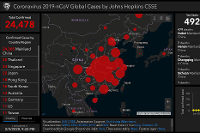

In [3]:
item = gis.content.search("Coronavirus_2019_nCoV_Cases owner:CSSE_covid19", outside_org=True)[0]
item

In [4]:
src_url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1"
fl = FeatureLayer(url=src_url)

In [5]:
df_global = fl.query(where="1=1",
                     return_geometry=True,
                     as_df=True)

In [6]:
df_global

,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key,SHAPE
0,1,None,Afghanistan,2021-08-31 00:21:31,33.939110,67.709953,153148,0,7116,0,None,None,Afghanistan,"{""x"": 67.70995300000004, ""y"": 33.9391100000000..."
1,2,None,Albania,2021-08-31 00:21:31,41.153300,20.168300,145333,0,2495,0,None,None,Albania,"{""x"": 20.168300000000045, ""y"": 41.153300000000..."
2,3,None,Algeria,2021-08-31 00:21:31,28.033900,1.659600,195574,0,5240,0,None,None,Algeria,"{""x"": 1.6596000000000686, ""y"": 28.033900000000..."
3,4,None,Andorra,2021-08-31 00:21:31,42.506300,1.521800,15032,0,130,0,None,None,Andorra,"{""x"": 1.5218000000000416, ""y"": 42.506300000000..."
4,5,None,Angola,2021-08-31 00:21:31,-11.202700,17.873900,47331,0,1210,0,None,None,Angola,"{""x"": 17.87390000000005, ""y"": -11.202699999999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,766,Ohio,US,2021-08-31 00:21:31,40.388783,-82.764915,1214986,0,20799,0,None,39,"Ohio, US","{""x"": -82.76491499999997, ""y"": 40.388783000000..."
766,767,Alabama,US,2021-08-31 00:21:31,32.318200,-86.902300,694523,0,12222,0,None,01,"Alabama, US","{""x"": -86.90229999999997, ""y"": 32.318200000000..."
767,768,North Carolina,US,2021-08-31 00:21:31,35.630066,-79.806419,1208303,0,14412,0,None,37,"North Carolina, US","{""x"": -79.80641899999995, ""y"": 35.630066000000..."
768,769,District of Columbia,US,2021-08-31 00:21:31,38.897438,-77.026817,55253,0,1159,0,None,11,"District of Columbia, US","{""x"": -77.02681699999994, ""y"": 38.897438000000..."


In [36]:
df_global[~pd.isnull(df_global['Province_State'])].groupby('Country_Region').sum()[['Confirmed', 'Recovered', 'Deaths']]

,Confirmed,Recovered,Deaths
Country_Region,,,
Australia,48816,0,991
Belgium,1175575,0,25354
Brazil,20676561,0,577565
Canada,1490617,0,26929
Chile,1635958,0,36778
China,106922,0,4848
Colombia,4899085,0,124567
Denmark,1317,0,2
France,220389,0,1854


In [7]:
fset_can = fl.query(where="Country_Region='Canada'")
fset_can

<FeatureSet> 16 features

<Item title:"Provinces and Territories of Canada" type:Feature Layer Collection owner:esri_canada>
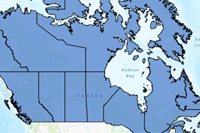

<Item title:"Provinces and Territories of Canada" type:Web Map owner:matts3223>
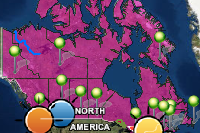

<Item title:"Map of Canada's Provinces and Territories" type:Web Map owner:lyncj3841>
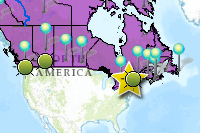

<Item title:"provinces of canada" type:Web Map owner:sreev4526>
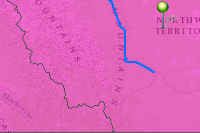

<Item title:"Provinces and Territories of Canada - copy" type:Feature Layer Collection owner:benjaminpiette>
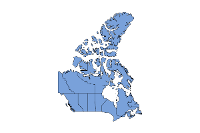

<Item title:"Map of Canada - Provinces and Territories 2019" type:Web Map owner:neild0911>
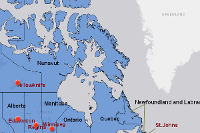

<Item title:"province and territories map of canada" type:Web Map owner:latfm2718>
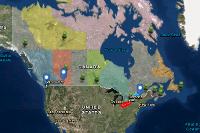

<Item title:"Provinces and Territories of Canada" type:Web Map owner:lemut7973>
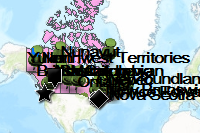

<Item title:"Canada's Capital & Major Cities in the Provinces/Territories" type:Web Map owner:sarahabz>
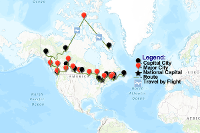

<Item title:"Map of Canada - Provinces and Territories 2019" type:Web Map owner:cotel1075>
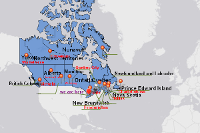

In [8]:
#Access the reference feature layer of Canada
province_item = gis.content.search(query="title: Provinces and Territories of Canada", outside_org=True)
for i in province_item:
    display(i)

In [4]:
province_item[0].id

'd3fef65386df4e63b02d6e23bb98a1ee'

In [9]:
provinces_item=gis.content.get('d3fef65386df4e63b02d6e23bb98a1ee')
provinces_flayer = provinces_item.layers[0]
provinces_df = provinces_flayer.query(as_df=True)
provinces_df.columns

Index(['FID', 'OBJECTID', 'type', 'type_en', 'postal', 'Shape_Leng',
       'Shape_Area', 'Name_EN', 'Nom_Fr', 'SHAPE'],
      dtype='object')

In [12]:
provinces_df

,FID,OBJECTID,type,type_en,postal,Shape_Leng,Shape_Area,Name_EN,Nom_Fr,SHAPE
2,3,4,Province,Province,AB,6.480084e+06,2.046155e+12,Alberta,Alberta,"{""rings"": [[[-12245068.4111107, 6273608.898894..."
3,4,5,Province,Province,BC,2.995914e+07,2.864108e+12,British Columbia,Colombie-Britannique,"{""rings"": [[[-13718912.1255787, 6177039.990696..."
0,1,2,Province,Province,MB,7.174885e+06,1.987391e+12,Manitoba,Manitoba,"{""rings"": [[[-9901534.70535117, 7730176.501052..."
9,10,11,Province,Province,NB,3.044798e+06,1.541619e+11,New Brunswick,Nouveau-Brunswick,"{""rings"": [[[-7432741.51518457, 5589409.025508..."
11,12,13,Province,Province,NL,2.939165e+07,1.113019e+12,Newfoundland and Labrador,Terre-Neuve-et-Labrador,"{""rings"": [[[-6100127.70123468, 5981762.739132..."
5,6,7,Territoire,Territory,NT,5.378878e+07,8.759245e+12,Northwest Territories,Territoires du Nord-Ouest,"{""rings"": [[[-15146891.140271, 10790828.976773..."
10,11,12,Province,Province,NS,5.853202e+06,1.108453e+11,Nova Scotia,Nouvelle-Écosse,"{""rings"": [[[-7303736.92286754, 5377372.138558..."
4,5,6,Territoire,Territory,NU,2.710973e+08,2.270183e+13,Nunavut,Nunavut,"{""rings"": [[[-8802092.92058305, 6735898.706205..."
7,8,9,Province,Province,ON,9.645718e+06,2.634173e+12,Ontario,Ontario,"{""rings"": [[[-8852214.91079477, 6615242.532552..."
12,13,14,Province,Province,PE,1.334824e+06,1.205146e+10,Prince Edward Island,|Île du Prince-Édouard,"{""rings"": [[[-6902255.67828035, 5855029.064068..."


In [10]:
tmp = provinces_df.sort_values('Name_EN', ascending=True)
provinces_df = tmp.drop_duplicates(subset='Name_EN', keep='last')
provinces_df.shape

(13, 10)

In [11]:
df_canada = fset_can.sdf[['Province_State', 'Confirmed', 'Recovered', 'Deaths']]
df_canada = df_canada.assign(Name_EN = df_canada["Province_State"])
df_canada

,Province_State,Confirmed,Recovered,Deaths,Name_EN
0,Alberta,252010,0,2371,Alberta
1,British Columbia,165413,0,1814,British Columbia
2,Diamond Princess,0,0,1,Diamond Princess
3,Grand Princess,13,0,0,Grand Princess
4,Manitoba,58681,0,1189,Manitoba
5,New Brunswick,2760,0,46,New Brunswick
6,Newfoundland and Labrador,1478,0,7,Newfoundland and Labrador
7,Northwest Territories,400,0,1,Northwest Territories
8,Nova Scotia,6030,0,94,Nova Scotia
9,Nunavut,657,0,4,Nunavut


In [12]:
#Confrimed cases of each province in Canada
cols_2 = ['Name_EN', 'postal', 'type_en','Shape_Leng','Shape_Area','SHAPE']
overlap_rows_canada = pd.merge(left = provinces_df[cols_2], right = df_canada, 
                              how='inner', on = 'Name_EN')
overlap_rows_canada

,Name_EN,postal,type_en,Shape_Leng,Shape_Area,SHAPE,Province_State,Confirmed,Recovered,Deaths
0,Alberta,AB,Province,6.480084e+06,2.046155e+12,"{'rings': [[[-12245068.4111107, 6273608.898894...",Alberta,252010,0,2371
1,British Columbia,BC,Province,2.995914e+07,2.864108e+12,"{'rings': [[[-13718912.1255787, 6177039.990696...",British Columbia,165413,0,1814
2,Manitoba,MB,Province,7.174885e+06,1.987391e+12,"{'rings': [[[-9901534.70535117, 7730176.501052...",Manitoba,58681,0,1189
3,New Brunswick,NB,Province,3.044798e+06,1.541619e+11,"{'rings': [[[-7432741.51518457, 5589409.025508...",New Brunswick,2760,0,46
4,Newfoundland and Labrador,NL,Province,2.939165e+07,1.113019e+12,"{'rings': [[[-6100127.70123468, 5981762.739132...",Newfoundland and Labrador,1478,0,7
5,Northwest Territories,NT,Territory,5.378878e+07,8.759245e+12,"{'rings': [[[-15146891.140271, 10790828.976773...",Northwest Territories,400,0,1
6,Nova Scotia,NS,Province,5.853202e+06,1.108453e+11,"{'rings': [[[-7303736.92286754, 5377372.138558...",Nova Scotia,6030,0,94
7,Nunavut,NU,Territory,2.710973e+08,2.270183e+13,"{'rings': [[[-8802092.92058305, 6735898.706205...",Nunavut,657,0,4
8,Ontario,ON,Province,9.645718e+06,2.634173e+12,"{'rings': [[[-8852214.91079477, 6615242.532552...",Ontario,572856,0,9551
9,Prince Edward Island,PE,Province,1.334824e+06,1.205146e+10,"{'rings': [[[-6902255.67828035, 5855029.064068...",Prince Edward Island,230,0,0


In [13]:
#Display confirmed cases in Canada as points
map1 = gis.map('Canada', zoomlevel=4)
map1.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"Confirmed"})
map1

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
#Display confirmed cases in Canada as polygons
map1b = gis.map('Canada')
map1b.clear_graphics()
overlap_rows_canada.spatial.plot(  kind='map', map_widget=map1b,
                                  renderer_type='c',  # for class breaks renderer
                                  method='esriClassifyNaturalBreaks',  # classification algorithm
                                  class_count=4,  # choose the number of classes
                                  col='Confirmed',  # numeric column to classify
                                  cmap='inferno',  # color map to pick colors from for each class
                                  alpha=0.7  # specify opacity
                                 )
map1b.zoom = 4
map1b.legend=True
map1b

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [15]:
#Display death cases in Canada as points
map2 = gis.map('Canada', zoomlevel=4)
map2.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"Deaths"})
map2

MapView(layout=Layout(height='400px', width='100%'))

In [16]:
#Display death cases in Canada as polygons
map2b = gis.map('Canada')
map2b.clear_graphics()
overlap_rows_canada.spatial.plot(  kind='map', map_widget=map2b,
                                  renderer_type='c',  # for class breaks renderer
                                  method='esriClassifyNaturalBreaks',  # classification algorithm
                                  class_count=4,  # choose the number of classes
                                  col='Deaths',  # numeric column to classify
                                  cmap='inferno',  # color map to pick colors from for each class
                                  alpha=0.7  # specify opacity
                                 )
map2b.zoom = 4
map2b.legend=True
map2b

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [25]:
####Time Series Analysis####
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [18]:
cases = ['confirmed', 'deaths', 'recovered']
sheet = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
suffix = '_global.csv'
df_list = []

for i in range(len(cases)):
    ts_url = sheet + cases[i] + suffix
    df = pd.read_csv(ts_url, header=0, escapechar='\\')
    display(df.head(3))
    df_list.append(df)
    exec("{0}=df".format(cases[i]))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152448,152448,152448,152583,152660,152722,152822,152960,152960,152960
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,138132,138790,139324,139721,140521,141365,142253,143174,144079,144847
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,190656,191171,191583,192089,192626,193171,193674,194186,194671,195162


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7054,7054,7054,7076,7083,7090,7093,7101,7101,7101
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2475,2477,2478,2478,2480,2483,2486,2487,2490,2492
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4957,4984,5004,5034,5063,5096,5121,5148,5179,5209


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# shape of matrices for confirmed, death, and recovered
df_list[0].shape, df_list[1].shape, df_list[2].shape

((279, 590), (279, 590), (264, 590))

In [22]:
#Canada Dataset
world_confirmed_ts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
world_confirmed_ts_df = pd.read_csv(world_confirmed_ts_url, header=0, escapechar='\\')
confirmed_canada=world_confirmed_ts_df[world_confirmed_ts_df["Country/Region"]=='Canada']
confirmed_canada

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21
39,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,242997,242997,242997,244969,245598,246674,247786,248954,248954,248954
40,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,158919,158919,158919,160630,161271,161969,162693,163560,163560,163560
41,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,58176,58176,58176,58283,58322,58425,58479,58506,58506,58506
44,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,2614,2614,2614,2672,2687,2697,2705,2721,2721,2721
45,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,1458,1458,1458,1460,1460,1462,1462,1469,1469,1469
46,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,328,328,328,351,358,368,395,400,400,400
47,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,5956,5956,5956,5956,5982,5989,5990,5999,5999,5999
48,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,657,657,657,657,657,657,657,657,657,657


In [27]:
#Chart the top 10 provinces with highest confirmed cases
time.sleep(3)
date_list = confirmed_canada.columns.tolist()[5:]
for d in date_list:
    clear_output(wait=True)
    top_10_per_d = confirmed_canada.groupby('Province/State')[['Province/State', d]].sum().sort_values(by=d, ascending=False).head(10)
    top_10_per_d.plot(kind='barh', log=True, figsize=(8,6))
    plt.ylabel("Province/State", labelpad=14)
    plt.xlabel("# of Confirmed Cases", labelpad=14)
    plt.title("Chart the confirmed cases per state", y=1.02)
    plt.show()
    time.sleep(1)

KeyboardInterrupt: 